## **SENTIMENT ANALYSIS ON GOAT MOVIE REVIEWS ON IMBD USING WEB SCRAPING AND NATURAL LANGUAGE PROCESSING**

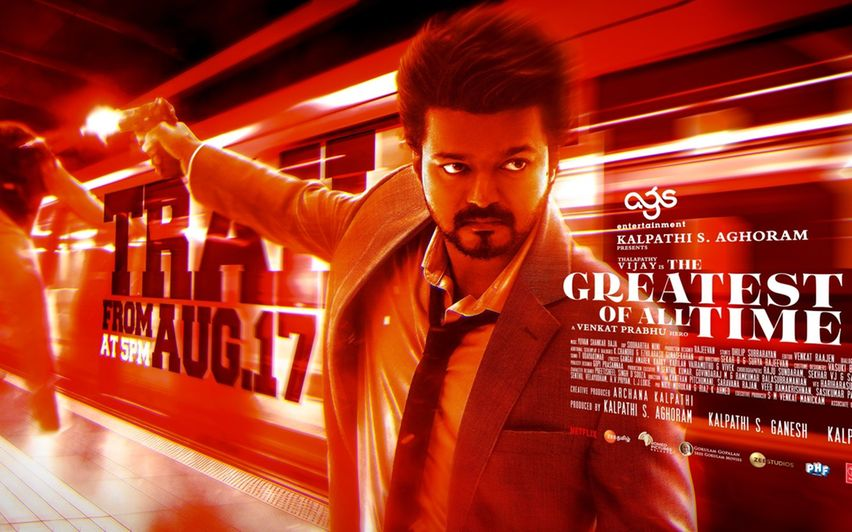

**SCRAPING DATA FROM WEB USING BEAUTIFUL SOUP AND REQUESTS**

[IMBD GOAT REVIEWS PAGE](https://www.imdb.com/title/tt27487934/reviews/_ajax?sort=curated&dir=desc&spoiler=hide&ratingFilter=0)


In [60]:
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

# Base URL for IMDb reviews page for Goat (2024)
base_url = 'https://www.imdb.com/title/tt27487934/reviews/_ajax?sort=curated&dir=desc&spoiler=hide&ratingFilter=0'

# Headers to simulate a browser visit
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Initializing request to the first page
response = requests.get(base_url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

In [61]:
#Displaying HTML souce of the scraped page
soup

 <div>
<div class="lister-list">
<div class="lister-item mode-detail imdb-user-review collapsable" data-review-id="rw9995468" data-vote-url="/title/tt27487934/review/rw9995468/vote/interesting">
<div class="review-container">
<div class="lister-item-content">
<div class="ipl-ratings-bar">
<span class="rating-other-user-rating">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none"></path>
<path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
<path d="M0 0h24v24H0z" fill="none"></path>
</svg>
<span>5</span><span class="point-scale">/10</span>
</span>
</div>
<a class="title" href="/review/rw9995468/?ref_=tt_urv"> Neither GOAT Nor Meh
</a> <div class="display-name-date">
<span class="display-name-link"><a href="/user/ur87634521/?ref_=tt_urv">maestromanohar</a></span><span class="review-date">5 September 2024</span>
</div>
<div

In [62]:
# Finding all div elements as all reviews are stored on 'div' element of the Scraped page
divs = soup.find_all('div')
# Extract and print all class names from the div elements
for i, div in enumerate(divs, 1):
    class_names = div.get('class')
    if class_names:
        print(f'Div {i}: {class_names}')

Div 2: ['lister-list']
Div 3: ['lister-item', 'mode-detail', 'imdb-user-review', 'collapsable']
Div 4: ['review-container']
Div 5: ['lister-item-content']
Div 6: ['ipl-ratings-bar']
Div 7: ['display-name-date']
Div 8: ['content']
Div 9: ['text', 'show-more__control']
Div 10: ['actions', 'text-muted']
Div 11: ['clear']
Div 12: ['gradient-expander', 'hidden', 'show-more']
Div 13: ['gradient-container', 'show-more__control']
Div 14: ['gradient-footer']
Div 15: ['ipl-expander']
Div 16: ['ipl-expander__container']
Div 17: ['expander-icon-wrapper', 'show-more__control']
Div 18: ['lister-item', 'mode-detail', 'imdb-user-review', 'collapsable']
Div 19: ['review-container']
Div 20: ['lister-item-content']
Div 21: ['ipl-ratings-bar']
Div 22: ['display-name-date']
Div 23: ['content']
Div 24: ['text', 'show-more__control']
Div 25: ['actions', 'text-muted']
Div 26: ['clear']
Div 27: ['gradient-expander', 'hidden', 'show-more']
Div 28: ['gradient-container', 'show-more__control']
Div 29: ['gradient-

In [63]:
# List to store all reviews
all_reviews = []

In [64]:
#out of all div elements classes of div elaments that contain reviws are 'text show-more__control', 'ipc-html-content ipc-html-content--base'
classes_to_scrape = ['text show-more__control', 'ipc-html-content ipc-html-content--base']
# Function to extract reviews from a soup object
def extract_reviews(soup):
    for div_class in classes_to_scrape:
        reviews = soup.find_all('div', class_=div_class)
        for review in reviews:
            review_text = review.text.strip()
            all_reviews.append(review_text)
extract_reviews(soup)

#Pagination key for extracting reviews in next pages
while True:
    # Find the "paginationKey" for loading more reviews
    load_more_data = soup.find('div', {'data-key': True})

    if load_more_data:
        pagination_key = load_more_data['data-key']
        # Make the next request using the paginationKey
        next_page_url = base_url + f"&paginationKey={pagination_key}"
        response = requests.get(next_page_url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')
        extract_reviews(soup)
    else:
        break

In [65]:
#printing reviews
for i, review in enumerate(all_reviews, 1):
    print(f"Review {i}: {review}\n")

Review 1: The same issue like previous Vijay movies since Mersal, promises so much, only to flatter to deceiveAnd it's usual Thalapathy show all the way, he tried as hard as he can to save the day, by donning the Ilayathalapathy character as well, but the script offered him only so much, after a point, it's exhausting.Rest of the cast have got absolutely nothing character or story wise, but the most laughable character is Meenakshi's, even GK character was better than this.Technically, it doesn't feel we are watching a big budget movie, shaky cinematography, movie needs serious trimming of 20-25 minutes, action was fine in bits and pieces, Yuvan's work is outright disaster, neither the songs worked nor BGM, horrible. De-ageing looked decent, but the VFX and production values are average.Coming to Venkat Prabhu, on paper, this looks a good idea, 1st half was decently engaging, but second half was below par. Few meta references, cameos worked, but this needed MANKATHA Level direction.Bot

In [66]:
print(f'Total number of reviews: {len(all_reviews)}')


Total number of reviews: 171


In [67]:
print(all_reviews)

["The same issue like previous Vijay movies since Mersal, promises so much, only to flatter to deceiveAnd it's usual Thalapathy show all the way, he tried as hard as he can to save the day, by donning the Ilayathalapathy character as well, but the script offered him only so much, after a point, it's exhausting.Rest of the cast have got absolutely nothing character or story wise, but the most laughable character is Meenakshi's, even GK character was better than this.Technically, it doesn't feel we are watching a big budget movie, shaky cinematography, movie needs serious trimming of 20-25 minutes, action was fine in bits and pieces, Yuvan's work is outright disaster, neither the songs worked nor BGM, horrible. De-ageing looked decent, but the VFX and production values are average.Coming to Venkat Prabhu, on paper, this looks a good idea, 1st half was decently engaging, but second half was below par. Few meta references, cameos worked, but this needed MANKATHA Level direction.Bottomline:

**TOKENIZING SENTENCES AND APPLYING SENTIMENT INTENSITY ANALYZER TO FIND POLRITY SCORES USING NLTK**

In [68]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [69]:
#tokenizing sentences for semantic analysis
tokenized_sentences = []
for review in all_reviews:
    sentences = nltk.sent_tokenize(review)  # Tokenize into sentences
    tokenized_sentences.extend(sentences)  # Add sentences to the list

In [70]:
#Printing tokenized sentences
for i, sentence in enumerate(tokenized_sentences, 1):
    print(f'Sentence {i}: {sentence}\n')

Sentence 1: The same issue like previous Vijay movies since Mersal, promises so much, only to flatter to deceiveAnd it's usual Thalapathy show all the way, he tried as hard as he can to save the day, by donning the Ilayathalapathy character as well, but the script offered him only so much, after a point, it's exhausting.Rest of the cast have got absolutely nothing character or story wise, but the most laughable character is Meenakshi's, even GK character was better than this.Technically, it doesn't feel we are watching a big budget movie, shaky cinematography, movie needs serious trimming of 20-25 minutes, action was fine in bits and pieces, Yuvan's work is outright disaster, neither the songs worked nor BGM, horrible.

Sentence 2: De-ageing looked decent, but the VFX and production values are average.Coming to Venkat Prabhu, on paper, this looks a good idea, 1st half was decently engaging, but second half was below par.

Sentence 3: Few meta references, cameos worked, but this needed 

In [71]:
print(len(tokenized_sentences))

1561


In [72]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [73]:
# Analyzing sentiment for each sentence
for sentence in tokenized_sentences:
    sentiment = sia.polarity_scores(sentence)
    print(f"Sentence: {sentence}")
    print(f"Sentiment: {sentiment}\n")

Sentence: The same issue like previous Vijay movies since Mersal, promises so much, only to flatter to deceiveAnd it's usual Thalapathy show all the way, he tried as hard as he can to save the day, by donning the Ilayathalapathy character as well, but the script offered him only so much, after a point, it's exhausting.Rest of the cast have got absolutely nothing character or story wise, but the most laughable character is Meenakshi's, even GK character was better than this.Technically, it doesn't feel we are watching a big budget movie, shaky cinematography, movie needs serious trimming of 20-25 minutes, action was fine in bits and pieces, Yuvan's work is outright disaster, neither the songs worked nor BGM, horrible.
Sentiment: {'neg': 0.078, 'neu': 0.746, 'pos': 0.176, 'compound': 0.8876}

Sentence: De-ageing looked decent, but the VFX and production values are average.Coming to Venkat Prabhu, on paper, this looks a good idea, 1st half was decently engaging, but second half was below 

In [74]:
#Classifying reviews as positive,negative,neutral based on their compound score
positive_reviews = []
negative_reviews = []
neutral_reviews = []

# Analyze sentiment for each sentence
for sentence in tokenized_sentences:
    sentiment = sia.polarity_scores(sentence)
    compound_score = sentiment['compound']

    # Classify based on compound score
    if compound_score > 0:
        positive_reviews.append(sentence)
    elif compound_score < 0:
        negative_reviews.append(sentence)
    else:
        neutral_reviews.append(sentence)


In [75]:
# Printing the number of positive, negative, and neutral sentences
print(f"Total Positive Sentences: {len(positive_reviews)}")
print(f"Total Negative Sentences: {len(negative_reviews)}")
print(f"Total Neutral Sentences: {len(neutral_reviews)}")

Total Positive Sentences: 839
Total Negative Sentences: 390
Total Neutral Sentences: 332


In [76]:
total_sentences = len(tokenized_sentences)
positive_percentage = len(positive_reviews) / total_sentences * 100
negative_percentage = len(negative_reviews) / total_sentences * 100
neutral_percentage = len(neutral_reviews) / total_sentences * 100

print(f"Positive Sentiment: {positive_percentage:.2f}%")
print(f"Negative Sentiment: {negative_percentage:.2f}%")
print(f"Neutral Sentiment: {neutral_percentage:.2f}%")


Positive Sentiment: 53.75%
Negative Sentiment: 24.98%
Neutral Sentiment: 21.27%


**INTERPRETATIONS OF DATA AND RESULTS**

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

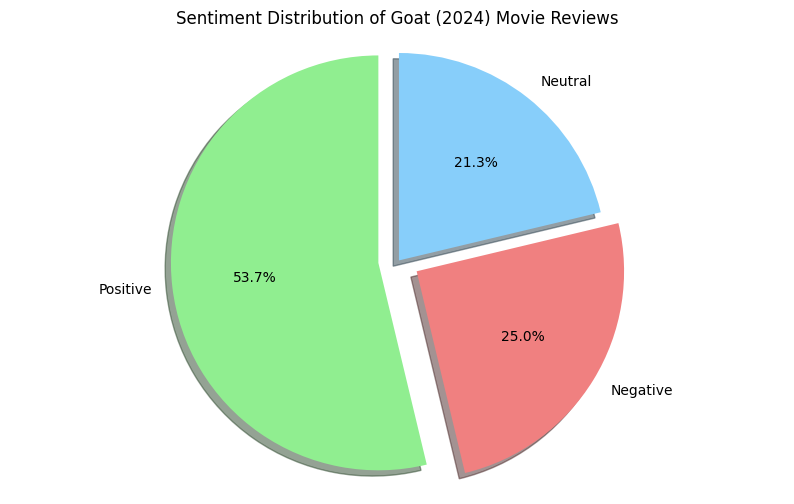

In [78]:
# pie chart for distribution of people's reviews
plt.figure(figsize=(10,6))
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive_percentage, negative_percentage, neutral_percentage]
colors = ['lightgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Sentiment Distribution of Goat (2024) Movie Reviews")
plt.show()

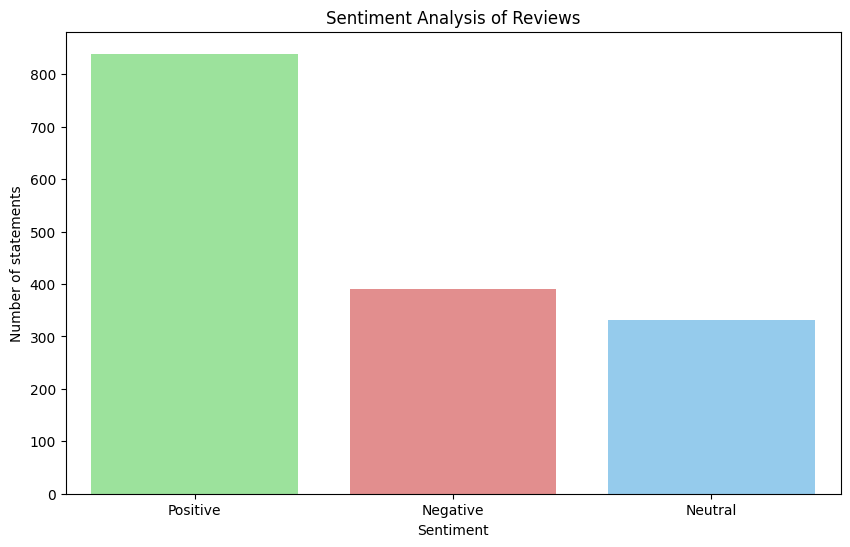

In [79]:
#barplot for count of =ve,-ve,neutral sentences of reviews
review_counts = [len(positive_reviews), len(negative_reviews), len(neutral_reviews)]
plt.figure(figsize=(10,6))
labels = ['Positive', 'Negative', 'Neutral']
colors = ['lightgreen', 'lightcoral', 'lightskyblue']
sns.barplot(x=labels, y=review_counts,palette=colors)
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of statements')
plt.show()


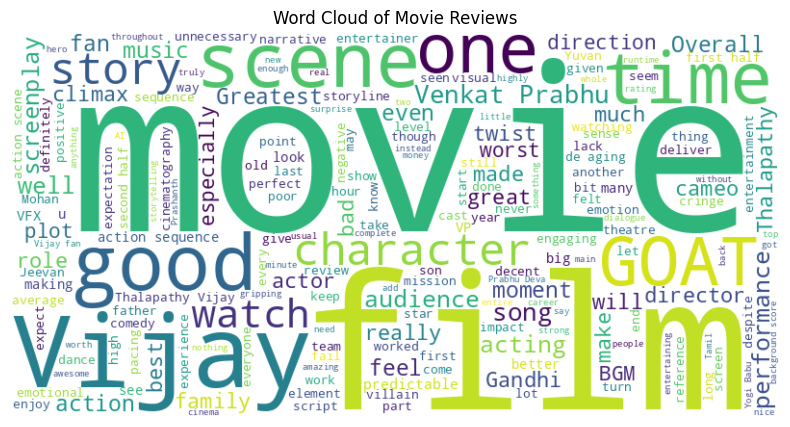

In [80]:
#word cloud for reviews given by user

all_reviews_text = ' '.join(positive_reviews + negative_reviews + neutral_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Movie Reviews')
plt.show()


**Result Interpretation:**

**Positive Sentiment: 53.75% of the reviews were positive, indicating that the majority of viewers enjoyed the movie and had favorable things to say about it.**

**Negative Sentiment: 24.98% of the reviews were negative, showing that a quarter of the audience expressed dissatisfaction or criticism.**

**Neutral Sentiment: 21.27% of the reviews were neutral, suggesting that a significant portion of reviewers felt indifferent or provided a balanced view without strong emotions.**

**This breakdown highlights overall viewer reception, with a generally positive trend.**